In [1]:
##########################NOTE::::
########################PLEASE READ BEFORE EXECUTION #################
"""
Assumptions :
    As assignment suggests, cursory analysis of stock companies, 
    that focus on understanding 2 params: MARKETCAP_RS_CR and P/E(P_BY_E) ratio
    and also various sectors based performance and distribution
    Thus I remove the cases where MARKETCAP_RS_CR and P/E(P_BY_E) ratio
    for CONSOLIDATED cases is absent.
    AS1: Basically we have 2 possible values. But I consider only CONSOLIDATED
    AS2: Remove NAN cases
    AS3: Consider MARKETCAP_RS_CR based ranking for only those sectors who have > 4 companies
    AS4: I dont write generic code for scrape. Code will impact, if website changes format
    and reduce or increase no of parameters
    AS5: in part 5 description below
    
STEP 1: DATA SCRAPE
Part 1 consists of web scraping of html links and list of 500 companies which appears
on :
    www.moneycontrol.com/india/stockpricequote
    When code is excuted, its necessary to either provide:
        www.moneycontrol.com/india/stockpricequote
        or
        provide list of companies in list companybook
 links_moneycontrol_v5.csv willbe file composed of all 500 companies on part 1 
completion

Part 2: DATA SCRAPE
This section contains all logic to extract the information of CONSOLIDATED Company
parameters for all 500 companies
This section will try to contact moneycontrol 500 times, thus may take time.
I didnt focus to optimize this time.
The web scraping takes 30 -40 mins
and finally we get the transpose file:       input_scrape_moneycontrol_500.csv

PART 3: Data Cleaning
CHECKING DUPLICATES, renaming columns, removing extra characters, datatype conversions
, fill NAN, drop NAN

PART 4: Data analysis and decide assumptions

PART 5:  Bucket P/E ratios in interval of 5, 11-15,16-20,21-25,...,66-70, then output list of
companies in each bucket
AS5: THERE ARE OUTLIERS in P/E meaning many cases where P/E > 70
I dont worry, as its not asked in question. Although need to worry, if its real market data
and need to find other resources to verify

PART 6: 3rd and 4th highest market cap companies sector wise.
ASSUMPTION: DO analysis for sectors having more than 3 companies
I try 3 methods to solve it. And 2 methods successful
BUT pandasql method fails as rank or rownum feature not available in it 
 

"""
 
#########################PART 1 ################################3   
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np  
import time  

In [2]:
 #---TRYING TO MAKE DICTIONARY
# Values will store the value of various params like p/e, marketcap, book value etc    
values = []
print ("Please mention what all companies you want to extract: PRESS 1 if you want all 500 companies. PRESS 2, if you want to provide list")
choice_input=input("ENTER THE VALUE:")

Please mention what all companies you want to extract: PRESS 1 if you want all 500 companies. PRESS 2, if you want to provide list
ENTER THE VALUE:1


In [3]:
url = input("Enter a website to extract the URL's from !!!!NOTE!!!: ALWAYS copy from browser the link:: www.moneycontrol.com/india/stockpricequote:")

Enter a website to extract the URL's from !!!!NOTE!!!: ALWAYS copy from browser the link:: www.moneycontrol.com/india/stockpricequote:www.moneycontrol.com/india/stockpricequote


In [4]:
print (url)
r  = requests.get("http://" +url)

data = r.text

soup = BeautifulSoup(data, "lxml")
mydivs = soup.findAll("a", {"class": "bl_12"})

www.moneycontrol.com/india/stockpricequote


In [5]:
for link in mydivs:
     value=link.get('href')
     values.append(value)
     #print(link.get('href'))
    
    
    
#for link in soup.find_all('a'):
    #print(link.get('href'))#
test_df = pd.DataFrame({'LINK': values})
print(test_df.info())    
e='a'
test_df['company_code'] = e
test_df['company_category'] = e
test_df['company_name'] = e


#FILL company_code
# FOR EXAMPLE: http://www.moneycontrol.com/india/stockpricequote/banksprivatesector/yesbank/YB
#has company code located as substring value after rightmost appearence of /
# SIMILAR BEHAVIOR for every 500 companies on http://www.moneycontrol.com/india/stockpricequote
for index, row in test_df.iterrows():
    i= (row["LINK"])
    #print (row.LINK)
    #print(i[i.rfind('/')+1:])  
    test_df.loc[index, 'company_code'] =(i[i.rfind('/')+1:])
#FILL company_category 
# FOR EXAMPLE: http://www.moneycontrol.com/india/stockpricequote/banksprivatesector/yesbank/YB
#has company_category located as substring value only after immediate right  of http://www.moneycontrol.com/india/stockpricequote/
# which comes at 50 th position and from that 50th position to next occurance of '/'    
for index, row in test_df.iterrows():
    i= (row["LINK"])
    #print(i[50:50+i[50:].find('/') ])
    test_df.loc[index, 'company_category'] =(i[50:50+i[50:].find('/') ])
#FILL company_name
#similarly this is automatically understood    
for index, row in test_df.iterrows():
    i= (row["LINK"])
    test_df.loc[index, 'company_name'] =(i[50+i[50:].find('/')+1: i.rfind('/')])

# deleting unwanted junk rows
test_df = test_df[test_df.LINK != 'javascript:;']
#MAKE dictionary
d= dict([(i,a) for i, a in zip( test_df.company_code, test_df.LINK)])
#print (d)    
for k,v in d.items():
            print(k, 'corresponds to', v)
            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 1 columns):
LINK    502 non-null object
dtypes: object(1)
memory usage: 4.0+ KB
None
MI42 corresponds to http://www.moneycontrol.com/india/stockpricequote/diversified/3mindia/MI42
PMS01 corresponds to http://www.moneycontrol.com/india/stockpricequote/computerssoftware/8kmilessoftwareservices/PMS01
AI45 corresponds to http://www.moneycontrol.com/india/stockpricequote/chemicals/aartiindustries/AI45
AO04 corresponds to http://www.moneycontrol.com/india/stockpricequote/oildrillingandexploration/abanoffshore/AO04
ABB corresponds to http://www.moneycontrol.com/india/stockpricequote/infrastructuregeneral/abbindia/ABB
AI51 corresponds to http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/abbottindia/AI51
ACC06 corresponds to http://www.moneycontrol.com/india/stockpricequote/cementmajor/acc/ACC06
AE13 corresponds to http://www.moneycontrol.com/india/stockpricequote/trading/adanienterprises

In [6]:
##########################################################################
#final  dictionary
# based on initial input choice at stdin, the dictionary is created either for list of few companies to analyze or
# for all 500 companies

if choice_input == '2':
    
    input_flag=''
    while input_flag == '':
     codes=[]
     lim= int(input("HOW MANY COMPANY CODES TO ANALYZE?"))
     print ("Enter all codes in 1 go, same as quantity YOU EXPRESS ")
     codes = [str(x) for x in input().split()]
     if len(codes)!= lim:
        print("RE-ENTER THE COMPANY CODES AGAIN, SAME AS COMPANY CODES TO ANALYZE?" )
     else:
      companybook=dict((k, d[k]) for k in codes)
      input_flag='INPUT_FINISH_FROM_USER'
      print ("INPUT FINISH AND BELOW IS LIST FOR FURTHER DATA EXTRACTION AND ANALYSIS")
      print (companybook)  


#############THIS BLOCK will choose if we want to do analysis of all 500 companies
if choice_input == '1':
 companybook=d
 print ("INPUT FINISH AND all 500 companies processing begins FOR FURTHER DATA EXTRACTION AND ANALYSIS")
#############3


INPUT FINISH AND all 500 companies processing begins FOR FURTHER DATA EXTRACTION AND ANALYSIS


In [7]:
#########################PART 1 ends COMPANY LIST companybook  is created ################################


#########################PART 2: SCRAPING BASED ON COMPANY LIST companybook ################################3   
   
# Values will store the value of various params like p/e, marketcap, book value etc    
# names will store parameter names as recovered from beautiful soup objects
# url1 will store the hyperlinks lists corresponding to each company evaluation, which is appended
# sectors will store company sector as derived from sec beautiful soup object
# C_CODE is company code list
names = []
values = [] 
url1 = [] 
sectors= [] 
C_CODE= [] 

In [8]:
for k,v in companybook.items():
            print(k, 'corresponds to', v)
            print ("***SCRAPING OF ABOVE COMPANY IN PROGRESS***")

            page = ''
            wait_param=0
            # This try catch necessary, coz server was observed refuse connection, if we try to 
            # approach moneycontrol more than threshold value
            #thus necessary to have some pause and retry and not quit as exception
            #although necessary to exit block, this page='a' is initialized, after 50 sec wait
            while page == '':
                    try:
                        response  = requests.get(v)
                        page = 'a'
                        break
                    except:
                        if wait_param<10:
                         print("Connection refused by the server..")
                         print("Let me sleep for 5 seconds")
                         print("ZZzzzz...")
                         time.sleep(5)
                         print("Was a nice sleep, now let me continue...")
                         wait_param=wait_param+1
                         continue
                        else:
                            page = 'a'
            #print(response.text[:500])
            html_soup = BeautifulSoup(response.text, 'html.parser')
        #"""
        #In HTML THIS IS WHAT WAS OBSERVED, And based on that,
        #necessary to identify appropriate tags like div, class, href, etc.
        #and use html soup
        #<div class="FL gL_10 UC">MARKET CAP (Rs Cr)</div>
        #<div class="FR gD_12">681,869.24</div>
        #<!-- Standalone data starts here -->
        #<div id="mktdet_1" name="mktdet_1" style="display:none;">
        #"""
        #CL
            #mc = html_soup.find_all('div', class_ = 'FL gL_10 UC')
            #vc = html_soup.find_all('div', class_ = 'FR gD_12')
            cc = html_soup.find_all("div",  {"class": ["FL gL_10 UC", "FR gD_12","mktdet_1"]})
            sec = html_soup.find_all('div', class_ = 'gry10')
            #sec[0].a
            #sec[0].a.text
            
            url2=k
            i=0
            for s in sec:
                if i==0:
                 sector=s.a.text
                 sectors.append(sector)
                 C_CODE.append(url2)
                i=i+1
            i=0    
        # Extract data from individual html code block: cc[0], cc[1], cc[2]...
            for container in cc:
                  
# If the container has got i value as even it is basically PARAMETER NAME: ex P/E, MARKETCAP
#  If the container has got i value as odd it is basically PARAMETER VALUE:
#i value 'even' and less than 22 corresponds to all rows of STANDALONE Situation of 
#particular company:
#These 22 rows divide: 11 for NAMES and 11 for VALUES
                    
                    # The name
                        if i%2 == 0 and i<=21:
                            name = container.text
                            names.append(name)
                            url1.append(url2)
                            
                        if i%2 > 0 and i<=21:
                    # The value
                            value=container.text
                            values.append(value)
                            #url1.append(url2)
                        i=i+1
                        #print(i)
                      
            
            
            test_df1 = pd.DataFrame({'parameter': names,
                                   'magnitude': values,
                                  'DETAIL': url1 })
            sectors_df=pd.DataFrame({'sector': sectors,
                                     'company_code':C_CODE})
            df_0=test_df1
            #test_df1.to_csv('example_moneycontrol_v5.csv')
            #the below block df, only serves for debugging, but still kept, as it creates the final desired structure we aim for CSV
            df = pd.DataFrame({names[0]: [values[0]],
                                   names[1]: [values[1]],
                                   names[2]: [values[2]],
            					   names[3]: [values[3]],
            					   names[4]: [values[4]],
            					   names[5]: [values[5]],
            					   names[6]: [values[6]],
            					   names[7]: [values[7]],
            					   names[8]: [values[8]],
            					   names[9]: [values[9]],
            					   names[10]: [values[10]],
                                   'company_code':url1[0]})
            df2 = df
            len(values)/10
            df2=df2.truncate(before=5500, after=5500)
            # Here we have 11 parameters, thus below code helps to create a transpose which is desired csv for nice analyze
            for j in list(range(int(len(values)/11))):
                if (10*j)<len(values)-10:
                 df = pd.DataFrame({names[0]: [values[0+(10*j)+j]],
                                   names[1]: [values[1+(10*j)+j]],
                                   names[2]: [values[2+(10*j)+j]],
            					   names[3]: [values[3+(10*j)+j]],
            					   names[4]: [values[4+(10*j)+j]],
            					   names[5]: [values[5+(10*j)+j]],
            					   names[6]: [values[6+(10*j)+j]],
            					   names[7]: [values[7+(10*j)+j]],
            					   names[8]: [values[8+(10*j)+j]],
            					   names[9]: [values[9+(10*j)+j]],
            					   names[10]: [values[10+(10*j)+j]],
                                   'company_code':url1[10+(10*j)+j]
                                   })
                #print(df)
                df2 = df2.append(df)
            
            
            
#df2.to_csv('example_moneycontrol_v5_transpose.csv')
result=pd.merge(test_df, df2, on="company_code")
result_f=pd.merge(result, sectors_df, on="company_code")
###NECESSARY merge to merge the sectors also

print ("$$$$$$$$$$$$$$$ SCRAPING IS COMPLETE, Plz check input_scrape_moneycontrol_500.csv $$$$$$$$$$$$$$$$")
print ("NOW CLEANING AND DATATYPE CONVERSIONS BEGINS..")

MI42 corresponds to http://www.moneycontrol.com/india/stockpricequote/diversified/3mindia/MI42
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
PMS01 corresponds to http://www.moneycontrol.com/india/stockpricequote/computerssoftware/8kmilessoftwareservices/PMS01
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
AI45 corresponds to http://www.moneycontrol.com/india/stockpricequote/chemicals/aartiindustries/AI45
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
AO04 corresponds to http://www.moneycontrol.com/india/stockpricequote/oildrillingandexploration/abanoffshore/AO04
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
ABB corresponds to http://www.moneycontrol.com/india/stockpricequote/infrastructuregeneral/abbindia/ABB
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
AI51 corresponds to http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/abbottindia/AI51
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
ACC06 corresponds to http://www.moneycontrol.com/india/stockpricequote/cementmajor/acc/ACC06
***SCRA

BI01 corresponds to http://www.moneycontrol.com/india/stockpricequote/leatherproducts/bataindia/BI01
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
BC12 corresponds to http://www.moneycontrol.com/india/stockpricequote/pesticidesagrochemicals/bayercropscience/BC12
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
BEM03 corresponds to http://www.moneycontrol.com/india/stockpricequote/infrastructuregeneral/beml/BEM03
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
BPI02 corresponds to http://www.moneycontrol.com/india/stockpricequote/paintsvarnishes/bergerpaintsindia/BPI02
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
BFU corresponds to http://www.moneycontrol.com/india/stockpricequote/powergenerationdistribution/bfutilities/BFU
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
BE03 corresponds to http://www.moneycontrol.com/india/stockpricequote/electricals/bharatelectronics/BE03
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
SM11 corresponds to http://www.moneycontrol.com/india/stockpricequote/financegeneral/b

C13 corresponds to http://www.moneycontrol.com/india/stockpricequote/mediaentertainment/dbcorp/C13
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
DCB01 corresponds to http://www.moneycontrol.com/india/stockpricequote/banksprivatesector/dcbbank/DCB01
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
DCM02 corresponds to http://www.moneycontrol.com/india/stockpricequote/diversified/dcmshriram/DCM02
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
DFP corresponds to http://www.moneycontrol.com/india/stockpricequote/fertilisers/deepakfertilizerspetrochemicalscoprn/DFP
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
DC11 corresponds to http://www.moneycontrol.com/india/stockpricequote/constructioncontractingrealestate/deltacorp/DC11
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
DN02 corresponds to http://www.moneycontrol.com/india/stockpricequote/mediaentertainment/dennetworks/DN02
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
DB corresponds to http://www.moneycontrol.com/india/stockpricequote/bankspublicsector/

GPI corresponds to http://www.moneycontrol.com/india/stockpricequote/cigarettes/godfreyphillipsindia/GPI
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
GCP corresponds to http://www.moneycontrol.com/india/stockpricequote/personalcare/godrejconsumerproducts/GCP
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
GI23 corresponds to http://www.moneycontrol.com/india/stockpricequote/personalcare/godrejindustries/GI23
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
GP11 corresponds to http://www.moneycontrol.com/india/stockpricequote/constructioncontractingrealestate/godrejproperties/GP11
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
GI25 corresponds to http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/granulesindia/GI25
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
GI01 corresponds to http://www.moneycontrol.com/india/stockpricequote/diversified/grasimindustries/GI01
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
GC20 corresponds to http://www.moneycontrol.com/india/stockpricequote/engines/grea

IRE01 corresponds to http://www.moneycontrol.com/india/stockpricequote/constructioncontractingrealestate/indiabullsrealestate/IRE01
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
IS13 corresponds to http://www.moneycontrol.com/india/stockpricequote/financeinvestments/indiabullsventures/IS13
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
IB04 corresponds to http://www.moneycontrol.com/india/stockpricequote/bankspublicsector/indianbank/IB04
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
IHC corresponds to http://www.moneycontrol.com/india/stockpricequote/hotels/indianhotelscompany/IHC
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
ICI07 corresponds to http://www.moneycontrol.com/india/stockpricequote/textilesspinningcottonblended/indocountindustries/ICI07
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
IR05 corresponds to http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/indocoremedies/IR05
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
IIB corresponds to http://www.moneycontrol.com/india/s

KG01 corresponds to http://www.moneycontrol.com/india/stockpricequote/textilesreadymadeapparels/kitexgarments/KG01
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
KMB corresponds to http://www.moneycontrol.com/india/stockpricequote/banksprivatesector/kotakmahindrabank/KMB
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
KPI02 corresponds to http://www.moneycontrol.com/india/stockpricequote/computerssoftwaremediumsmall/kpittechnologies/KPI02
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
M15 corresponds to http://www.moneycontrol.com/india/stockpricequote/textilesreadymadeapparels/kprmill/M15
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
KRB01 corresponds to http://www.moneycontrol.com/india/stockpricequote/foodprocessing/krbl/KRB01
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
KDI01 corresponds to http://www.moneycontrol.com/india/stockpricequote/foodprocessing/kwality/KDI01
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
LFH corresponds to http://www.moneycontrol.com/india/stockpricequote/financeinvestme

NI corresponds to http://www.moneycontrol.com/india/stockpricequote/foodprocessing/nestleindia/NI
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
NMI corresponds to http://www.moneycontrol.com/india/stockpricequote/financegeneral/network18mediainvestments/NMI
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
N07 corresponds to http://www.moneycontrol.com/india/stockpricequote/powergenerationdistribution/nhpc/N07
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
NII corresponds to http://www.moneycontrol.com/india/stockpricequote/computerssoftwaretraining/niit/NII
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
NII02 corresponds to http://www.moneycontrol.com/india/stockpricequote/computerssoftware/niittechnologies/NII02
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
NP08 corresponds to http://www.moneycontrol.com/india/stockpricequote/plastics/nilkamal/NP08
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
NLC corresponds to http://www.moneycontrol.com/india/stockpricequote/powergenerationdistribution/nlcindia/NLC

RF07 corresponds to http://www.moneycontrol.com/india/stockpricequote/leatherproducts/relaxofootwears/RF07
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
RI corresponds to http://www.moneycontrol.com/india/stockpricequote/refineries/relianceindustries/RI
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
RC13 corresponds to http://www.moneycontrol.com/india/stockpricequote/telecommunicationsservice/reliancecommunications/RC13
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
RI38 corresponds to http://www.moneycontrol.com/india/stockpricequote/powergenerationdistribution/relianceinfrastructure/RI38
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
PS04 corresponds to http://www.moneycontrol.com/india/stockpricequote/shipping/reliancenavalengineering/PS04
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
RP corresponds to http://www.moneycontrol.com/india/stockpricequote/powergenerationdistribution/reliancepower/RP
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
RE09 corresponds to http://www.moneycontrol.com/india/st

TS09 corresponds to http://www.moneycontrol.com/india/stockpricequote/computerssoftwaremediumsmall/takesolutions/TS09
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
TNN corresponds to http://www.moneycontrol.com/india/stockpricequote/paper/tamilnadunewsprintpapers/TNN
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
TC corresponds to http://www.moneycontrol.com/india/stockpricequote/chemicals/tatachemicals/TC
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
TC14 corresponds to http://www.moneycontrol.com/india/stockpricequote/plantationsteacoffee/tatacoffee/TC14
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
TC17 corresponds to http://www.moneycontrol.com/india/stockpricequote/telecommunicationsservice/tatacommunications/TC17
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
TE corresponds to http://www.moneycontrol.com/india/stockpricequote/computerssoftware/tataelxsi/TE
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
TT corresponds to http://www.moneycontrol.com/india/stockpricequote/plantationsteacoffee/tata

WAB corresponds to http://www.moneycontrol.com/india/stockpricequote/autoancillaries/wabcoindia/WAB
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
WGS corresponds to http://www.moneycontrol.com/india/stockpricequote/steeltubespipes/welspuncorp/WGS
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
WI03 corresponds to http://www.moneycontrol.com/india/stockpricequote/textilesweaving/welspunindia/WI03
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
DIC corresponds to http://www.moneycontrol.com/india/stockpricequote/hotels/westlifedevelopment/DIC
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
WI corresponds to http://www.moneycontrol.com/india/stockpricequote/consumergoodswhitegoods/whirlpoolindia/WI
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
W corresponds to http://www.moneycontrol.com/india/stockpricequote/computerssoftware/wipro/W
***SCRAPING OF ABOVE COMPANY IN PROGRESS***
W05 corresponds to http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/wockhardt/W05
***SCRAPING OF ABOVE COMPANY 

In [9]:
result_f.head()

,LINK,company_code,company_category,company_name,BOOK VALUE (Rs),DIV (%),DIV YIELD.(%),EPS (TTM),FACE VALUE (Rs),INDUSTRY P/E,MARKET CAP (Rs Cr),Market Lot,P/C,P/E,PRICE/BOOK,sector
0,http://www.moneycontrol.com/india/stockpricequ...,MI42,diversified,3mindia,1364.33,0.00%,-%,275.66,10.00,22.07,"22,192.19",1,62.99,71.46,14.44,DIVERSIFIED
1,http://www.moneycontrol.com/india/stockpricequ...,PMS01,computerssoftware,8kmilessoftwareservices,28.49,0.00%,-%,1.60,5.00,21.82,"1,631.62",1,285.91,334.16,18.77,COMPUTERS - SOFTWARE
2,http://www.moneycontrol.com/india/stockpricequ...,AI45,chemicals,aartiindustries,200.01,20.00%,0.08%,38.92,5.00,24.63,"10,526.72",1,23.28,33.27,6.47,CHEMICALS
3,http://www.moneycontrol.com/india/stockpricequ...,AO04,oildrillingandexploration,abanoffshore,701.88,0.00%,-%,1.47,2.00,11.73,747.95,1,4.41,87.18,0.18,OIL DRILLING AND EXPLORATION
4,http://www.moneycontrol.com/india/stockpricequ...,ABB,infrastructuregeneral,abbindia,170.21,200.00%,0.33%,20.41,2.00,47.97,"25,813.62",1,43.72,59.68,7.16,INFRASTRUCTURE - GENERAL


In [10]:

#ABOVE FILE NEEDS CLEANING AND DATATYPE CONVERSIONS which is all in below PART 3
#########################PART 2 ends ################################

#########################PART 3  ################################3   

######################CLEANING############################

######################CLEANING############################
##REMOVE unwanted symbols
result_f['P/E'] = result_f['P/E'].str.replace(',', '')
result_f['DIV (%)'] = result_f['DIV (%)'].str.replace('%','')
result_f['DIV YIELD.(%)'] = result_f['DIV YIELD.(%)'].str.replace('%','')
result_f['MARKET CAP (Rs Cr)'] = result_f['MARKET CAP (Rs Cr)'].str.replace(',', '')

result_f=result_f.replace('-', np.NaN)
result_f = result_f.replace({
        'DIV YIELD.(%)': '',
        'P/E': '',
        'EPS (TTM)': ''
    }, np.nan)
result_f=result_f.replace('%', '')
# removing rows where company_code is null
result_f = result_f[result_f['company_code']!= '']

#rename columns for SQL as well ease
result_f = result_f.rename(columns={'LINK': 'LINK', 'BOOK VALUE (Rs)': 'BOOK_VALUE_RS'
                                    ,'DIV (%)': 'DIV_PERCENT', 'DIV YIELD.(%)': 'DIV_YIELD_PERCENT'
                                    ,'EPS (TTM)': 'EPS_TTM', 'FACE VALUE (Rs)': 'FACE_VALUE'
                                    ,'INDUSTRY P/E': 'INDUSTRY_P_BY_E', 'MARKET CAP (Rs Cr)': 'MARKETCAP_RS_CR'
                                    ,'P/C': 'P_BY_C', 'P/E': 'P_BY_E'
                                    ,'PRICE/BOOK': 'PRICE_BY_BOOK'
                                    ,'Market Lot': 'MARKET_LOT'}) 
result_f['EPS_TTM'] = result_f['EPS_TTM'].str.replace(',', '')  
result_f['P_BY_C'] = result_f['P_BY_C'].str.replace(',', '')    
  
#changing datatype

result_f['BOOK_VALUE_RS'] = result_f.BOOK_VALUE_RS.astype(float)
result_f['DIV_PERCENT'] = result_f.DIV_PERCENT.astype(float)
result_f['DIV_YIELD_PERCENT'] = result_f.DIV_YIELD_PERCENT.astype(float)
result_f['EPS_TTM'] = result_f.EPS_TTM.astype(float)
result_f['FACE_VALUE'] = result_f.FACE_VALUE.astype(float)
result_f['INDUSTRY_P_BY_E'] = result_f.INDUSTRY_P_BY_E.astype(float)
result_f['MARKETCAP_RS_CR'] = result_f.MARKETCAP_RS_CR.astype(float)
result_f['P_BY_C'] = result_f.P_BY_C.astype(float)
result_f['P_BY_E'] = result_f.P_BY_E.astype(float)
result_f['PRICE_BY_BOOK'] = result_f.PRICE_BY_BOOK.astype(float)
result_f.dtypes
#CHECKING DUPLICATES
result_f.head()
result_f.shape
result_f[result_f.company_code.duplicated()]
if result_f.company_code.duplicated().sum()==0:
    print  ('No DUPLICATE data of COMPANIES')

No DUPLICATE data of COMPANIES


In [11]:

###FINAL FILE ABOVE FOR DATA ANALYSIS
 #########################PART 3 ends ################################

#########################PART 4  ################################3     
######################################################################
######################################################################
##############ANALYSIS#########################################3
result_f.head()
result_f.index
result_f.columns
result_f.describe(include='all')
#THERE ARE 90 SECTORS, 500 COMPANIES, PHARMACEUTICALS has max of 39 companies
result_f.describe(include=['object'])
result_f.describe()
#result_f['sector'].value_counts().plot(kind='bar')
result_f.groupby('company_category').size().plot(kind='bar',figsize=(13,9))
#List unique values in the df['name'] column
#checking the values and data we re interested into: MARKETCAP_RS_CR and P_BY_E
#NAN is observed, which must be removed, as no other way to calculate the values
result_f.isnull().sum()
result_f.loc[0:,['company_code','MARKETCAP_RS_CR','P_BY_E']]

# if 'any' values are missing in a row (considering only 'MARKETCAP_RS_CR' and 'P_BY_E'), then drop that row
result_f.dropna(subset=['MARKETCAP_RS_CR','P_BY_E'], how='any').shape
result_f['P_BY_E'].value_counts(dropna=False)
#result_f = result_f[np.isfinite(result_f['P_BY_E'])]
result_f=result_f.dropna(subset=['MARKETCAP_RS_CR','P_BY_E'], how='any')

print ("******************$$$ CLAENING IS COMPLETE, Plz check input_scrape_moneycontrol_443_after_cleaning_analyze_v2.csv $$$$$$$$$$$$$$$$")
print ("****************************************")
print ("NOW ANALYZE BEGINS FOR P/E..\
       .....")
###FINAL FILE ABOVE FOR questions and analysis and SQL

###443 companies available, as 57 companies didnt have P/E ratio

#########################PART 4 ends ################################3     




******************$$$ CLAENING IS COMPLETE, Plz check input_scrape_moneycontrol_443_after_cleaning_analyze_v2.csv $$$$$$$$$$$$$$$$
****************************************
NOW ANALYZE BEGINS FOR P/E..       .....


In [12]:
result_f

,LINK,company_code,company_category,company_name,BOOK_VALUE_RS,DIV_PERCENT,DIV_YIELD_PERCENT,EPS_TTM,FACE_VALUE,INDUSTRY_P_BY_E,MARKETCAP_RS_CR,MARKET_LOT,P_BY_C,P_BY_E,PRICE_BY_BOOK,sector
0,http://www.moneycontrol.com/india/stockpricequ...,MI42,diversified,3mindia,1364.33,0.0,NaN,275.66,10.0,22.07,22192.19,1,62.99,71.46,14.44,DIVERSIFIED
1,http://www.moneycontrol.com/india/stockpricequ...,PMS01,computerssoftware,8kmilessoftwareservices,28.49,0.0,NaN,1.60,5.0,21.82,1631.62,1,285.91,334.16,18.77,COMPUTERS - SOFTWARE
2,http://www.moneycontrol.com/india/stockpricequ...,AI45,chemicals,aartiindustries,200.01,20.0,0.08,38.92,5.0,24.63,10526.72,1,23.28,33.27,6.47,CHEMICALS
3,http://www.moneycontrol.com/india/stockpricequ...,AO04,oildrillingandexploration,abanoffshore,701.88,0.0,NaN,1.47,2.0,11.73,747.95,1,4.41,87.18,0.18,OIL DRILLING AND EXPLORATION
4,http://www.moneycontrol.com/india/stockpricequ...,ABB,infrastructuregeneral,abbindia,170.21,200.0,0.33,20.41,2.0,47.97,25813.62,1,43.72,59.68,7.16,INFRASTRUCTURE - GENERAL
5,http://www.moneycontrol.com/india/stockpricequ...,AI51,pharmaceuticals,abbottindia,841.52,400.0,0.61,188.83,10.0,29.05,13888.76,1,33.27,34.61,7.77,PHARMACEUTICALS
6,http://www.moneycontrol.com/india/stockpricequ...,ACC06,cementmajor,acc,498.72,260.0,1.99,50.54,10.0,36.29,24476.19,1,15.40,25.79,2.61,CEMENT - MAJOR
7,http://www.moneycontrol.com/india/stockpricequ...,AE13,trading,adanienterprises,36.04,40.0,0.30,1.79,1.0,49.47,14528.49,1,51.00,73.80,3.67,TRADING
8,http://www.moneycontrol.com/india/stockpricequ...,MPS,infrastructuregeneral,adaniportsspecialeconomiczone,93.06,65.0,0.35,12.07,2.0,39.36,77215.44,1,26.00,30.89,4.01,INFRASTRUCTURE - GENERAL
11,http://www.moneycontrol.com/india/stockpricequ...,PFR,retail,adityabirlafashionretail,12.43,0.0,NaN,1.53,10.0,71.87,10923.73,1,27.38,92.52,11.39,RETAIL


In [13]:

#########################PART 5 starts  ################################3     

# cleaning rows which has empty P/E ratio
#result_f = result[result['P/E']!= '-']

## we need P/E ranges basically and companies under those ranges 
#Bucket P/E ratios in interval of 5, 11-15,16-20,21-25,...,66-70, then output list of
#companies in each bucket

t=0.0
for x in range(0,15):
 print ("BUCKET IS:", t,"to:", t+5)   
 print(result_f[(result_f['P_BY_E']>=t) & (result_f['P_BY_E']<t+5) ].loc[0:,['company_code','MARKETCAP_RS_CR','P_BY_E']])
 t=t+5

###THERE ARE OUTLIERS in P/E
print ("OUTLIERS OF P/E, having more value of P/E than 70, which can either be fixed by reverify \
       or data can be normnalized using modifed log values. Latter wasnt expected and not done ")
print(result_f[(result_f['P_BY_E']>=70) & (result_f['P_BY_E']<20000) ].loc[0:,['company_code','MARKETCAP_RS_CR','P_BY_E']])


#########################PART 5 ends ################################3   



BUCKET IS: 0.0 to: 5.0
    company_code  MARKETCAP_RS_CR  P_BY_E
94         CPC02          4476.28    4.90
359        PFC02         21767.47    3.72
377        REC02         22425.19    4.83
388         RI15           674.17    4.39
396        PID01          1562.35    3.86
420         SA10          3508.97    3.96
472         UL02          1697.58    0.66
BUCKET IS: 5.0 to: 10.0
    company_code  MARKETCAP_RS_CR  P_BY_E
50           BCM          1684.66    7.62
112        DCM02          4968.31    7.22
164          GNV          7281.37    9.22
175          GSF          4542.64    9.55
176        GAC01          4391.53    8.21
178          GHC          2659.17    7.30
179          GMD          3973.41    9.14
203          HPC         46659.45    7.34
216          ITN          1598.75    6.35
235          IOC        163255.52    7.65
246         JA02          3514.90    9.97
250          JSH          3784.39    9.56
252         JS08          3061.65    7.93
278        KDI01           70

In [14]:
#########################PART 6 ################################3   
print ("****************************************")
print ("NOW ANALYZE BEGINS for 3rd and 4th highest market cap companies sector wise.\
       .....")

### a. 3rd and 4th highest market cap companies sector wise.

#How many sectors have more than 4 companies
print ("In analysis data-How many sectors have more than 4 companies")
print(result_f.company_category.value_counts())

****************************************
NOW ANALYZE BEGINS for 3rd and 4th highest market cap companies sector wise.       .....
In analysis data-How many sectors have more than 4 companies
pharmaceuticals                          37
miscellaneous                            20
computerssoftware                        19
infrastructuregeneral                    16
cementmajor                              15
banksprivatesector                       14
chemicals                                13
mediaentertainment                       11
personalcare                             11
constructioncontractingrealestate        11
foodprocessing                           11
powergenerationdistribution              10
financeinvestments                        9
financehousing                            9
oildrillingandexploration                 8
financegeneral                            8
financeleasinghirepurchase                8
constructioncontractingcivil              8
diversified      

In [15]:
result_f.shape


(443, 16)

In [16]:
# generate 'sector_companies_count' DF
sector_companies_count = pd.DataFrame(result_f.company_category.value_counts().reset_index())
sector_companies_count.columns = ['company_category', 'count_comp_cat']


# merge 'result_f' & 'sector_companies_count'
result_f = pd.merge(result_f, sector_companies_count, on='company_category')
result_f.dtypes


LINK                  object
company_code          object
company_category      object
company_name          object
BOOK_VALUE_RS        float64
DIV_PERCENT          float64
DIV_YIELD_PERCENT    float64
EPS_TTM              float64
FACE_VALUE           float64
INDUSTRY_P_BY_E      float64
MARKETCAP_RS_CR      float64
MARKET_LOT            object
P_BY_C               float64
P_BY_E               float64
PRICE_BY_BOOK        float64
sector                object
count_comp_cat         int64
dtype: object

In [17]:
sector_companies_count

,company_category,count_comp_cat
0,pharmaceuticals,37
1,miscellaneous,20
2,computerssoftware,19
3,infrastructuregeneral,16
4,cementmajor,15
5,banksprivatesector,14
6,chemicals,13
7,mediaentertainment,11
8,personalcare,11
9,constructioncontractingrealestate,11


In [18]:
result_f

,LINK,company_code,company_category,company_name,BOOK_VALUE_RS,DIV_PERCENT,DIV_YIELD_PERCENT,EPS_TTM,FACE_VALUE,INDUSTRY_P_BY_E,MARKETCAP_RS_CR,MARKET_LOT,P_BY_C,P_BY_E,PRICE_BY_BOOK,sector,count_comp_cat
0,http://www.moneycontrol.com/india/stockpricequ...,MI42,diversified,3mindia,1364.33,0.0,NaN,275.66,10.0,22.07,22192.19,1,62.99,71.46,14.44,DIVERSIFIED,7
1,http://www.moneycontrol.com/india/stockpricequ...,BLC,diversified,balmerlawriecompany,118.49,70.0,3.16,16.21,10.0,22.07,2523.45,1,11.94,13.66,1.87,DIVERSIFIED,7
2,http://www.moneycontrol.com/india/stockpricequ...,CTI,diversified,centurytextilesindustries,255.47,55.0,0.60,33.27,10.0,22.07,10211.78,1,14.90,27.48,3.58,DIVERSIFIED,7
3,http://www.moneycontrol.com/india/stockpricequ...,DCM02,diversified,dcmshriram,198.77,290.0,1.90,42.39,2.0,22.07,4968.31,1,6.01,7.22,1.54,DIVERSIFIED,7
4,http://www.moneycontrol.com/india/stockpricequ...,GI01,diversified,grasimindustries,247.47,275.0,0.53,26.90,2.0,22.07,67808.36,1,28.30,38.34,4.17,DIVERSIFIED,7
5,http://www.moneycontrol.com/india/stockpricequ...,NBV,diversified,navabharatventures,160.54,50.0,0.69,9.05,2.0,22.07,2606.31,1,13.10,16.13,0.91,DIVERSIFIED,7
6,http://www.moneycontrol.com/india/stockpricequ...,V,diversified,voltas,105.36,350.0,0.67,15.15,1.0,22.07,17220.90,1,33.09,34.35,4.94,DIVERSIFIED,7
7,http://www.moneycontrol.com/india/stockpricequ...,PMS01,computerssoftware,8kmilessoftwareservices,28.49,0.0,NaN,1.60,5.0,21.82,1631.62,1,285.91,334.16,18.77,COMPUTERS - SOFTWARE,19
8,http://www.moneycontrol.com/india/stockpricequ...,IE07,computerssoftware,cyient,202.30,210.0,1.44,35.59,5.0,21.82,8219.09,1,18.16,20.45,3.60,COMPUTERS - SOFTWARE,19
9,http://www.moneycontrol.com/india/stockpricequ...,HCL02,computerssoftware,hcltechnologies,186.49,600.0,1.27,52.87,2.0,21.82,131914.73,1,15.98,17.92,5.08,COMPUTERS - SOFTWARE,19


In [19]:

result_f.describe(include='all')
#THERE ARE 42 SECTORS, 100 COMPANIES, PHARMACEUTICALS has max of 7 companies


,LINK,company_code,company_category,company_name,BOOK_VALUE_RS,DIV_PERCENT,DIV_YIELD_PERCENT,EPS_TTM,FACE_VALUE,INDUSTRY_P_BY_E,MARKETCAP_RS_CR,MARKET_LOT,P_BY_C,P_BY_E,PRICE_BY_BOOK,sector,count_comp_cat
count,443,443,443,443,443.000000,443.000000,388.000000,443.000000,443.000000,443.000000,443.000000,443,443.000000,443.00000,442.000000,443,443.000000
unique,443,443,88,443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,88,NaN
top,http://www.moneycontrol.com/india/stockpricequ...,DIC,pharmaceuticals,bajajfinance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,PHARMACEUTICALS,NaN
freq,1,1,37,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443,NaN,NaN,NaN,37,NaN
mean,NaN,NaN,NaN,NaN,266.574153,228.218284,1.257732,37.938397,5.313770,36.206907,27846.731061,NaN,68.042573,104.70386,5.585905,NaN,10.814898
std,NaN,NaN,NaN,NaN,1116.910154,494.821524,1.646438,134.429118,4.005479,43.575573,66926.283592,NaN,491.786539,667.96599,6.032494,NaN,9.494798
min,NaN,NaN,NaN,NaN,-0.710000,0.000000,0.030000,0.010000,1.000000,5.800000,674.170000,NaN,0.650000,0.66000,0.090000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,59.420000,25.000000,0.370000,6.200000,2.000000,22.070000,3959.250000,NaN,14.865000,19.14500,2.162500,NaN,4.000000
50%,NaN,NaN,NaN,NaN,118.490000,100.000000,0.770000,14.350000,5.000000,29.780000,8559.090000,NaN,23.300000,31.36000,3.830000,NaN,8.000000
75%,NaN,NaN,NaN,NaN,223.135000,225.000000,1.335000,33.440000,10.000000,37.260000,22308.690000,NaN,37.475000,55.06000,6.790000,NaN,14.000000


In [20]:
result_f.describe(include=['object'])

,LINK,company_code,company_category,company_name,MARKET_LOT,sector
count,443,443,443,443,443,443
unique,443,443,88,443,1,88
top,http://www.moneycontrol.com/india/stockpricequ...,DIC,pharmaceuticals,bajajfinance,1,PHARMACEUTICALS
freq,1,1,37,1,443,37


In [21]:
result_f.columns #NOTE company_category and SECTOR are same

Index(['LINK', 'company_code', 'company_category', 'company_name',
       'BOOK_VALUE_RS', 'DIV_PERCENT', 'DIV_YIELD_PERCENT', 'EPS_TTM',
       'FACE_VALUE', 'INDUSTRY_P_BY_E', 'MARKETCAP_RS_CR', 'MARKET_LOT',
       'P_BY_C', 'P_BY_E', 'PRICE_BY_BOOK', 'sector', 'count_comp_cat'],
      dtype='object')

In [22]:
result_f.describe()


,BOOK_VALUE_RS,DIV_PERCENT,DIV_YIELD_PERCENT,EPS_TTM,FACE_VALUE,INDUSTRY_P_BY_E,MARKETCAP_RS_CR,P_BY_C,P_BY_E,PRICE_BY_BOOK,count_comp_cat
count,443.000000,443.000000,388.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.00000,442.000000,443.000000
mean,266.574153,228.218284,1.257732,37.938397,5.313770,36.206907,27846.731061,68.042573,104.70386,5.585905,10.814898
std,1116.910154,494.821524,1.646438,134.429118,4.005479,43.575573,66926.283592,491.786539,667.96599,6.032494,9.494798
min,-0.710000,0.000000,0.030000,0.010000,1.000000,5.800000,674.170000,0.650000,0.66000,0.090000,1.000000
25%,59.420000,25.000000,0.370000,6.200000,2.000000,22.070000,3959.250000,14.865000,19.14500,2.162500,4.000000
50%,118.490000,100.000000,0.770000,14.350000,5.000000,29.780000,8559.090000,23.300000,31.36000,3.830000,8.000000
75%,223.135000,225.000000,1.335000,33.440000,10.000000,37.260000,22308.690000,37.475000,55.06000,6.790000,14.000000
max,22721.940000,5000.000000,11.300000,2575.440000,10.000000,745.230000,705012.980000,9733.750000,12978.33000,60.050000,37.000000


In [23]:
result_f.isnull().sum()
## WE OBSERVE 0 companies dont have P/E ratio, so data looks ok to proceed as no , NULLABLE ENTITIES except DIV_YIELD_PERCENT which
#we dont use

LINK                  0
company_code          0
company_category      0
company_name          0
BOOK_VALUE_RS         0
DIV_PERCENT           0
DIV_YIELD_PERCENT    55
EPS_TTM               0
FACE_VALUE            0
INDUSTRY_P_BY_E       0
MARKETCAP_RS_CR       0
MARKET_LOT            0
P_BY_C                0
P_BY_E                0
PRICE_BY_BOOK         1
sector                0
count_comp_cat        0
dtype: int64

In [24]:
result_f.loc[0:,['company_code','MARKETCAP_RS_CR','P_BY_E']]
## OUR INTEREST

,company_code,MARKETCAP_RS_CR,P_BY_E
0,MI42,22192.19,71.46
1,BLC,2523.45,13.66
2,CTI,10211.78,27.48
3,DCM02,4968.31,7.22
4,GI01,67808.36,38.34
5,NBV,2606.31,16.13
6,V,17220.90,34.35
7,PMS01,1631.62,334.16
8,IE07,8219.09,20.45
9,HCL02,131914.73,17.92


In [25]:
df_cc=result_f[result_f.count_comp_cat >= 4]
df_cc.shape
##our sectors of interest in which need to find 3rd and 4th top MARKETCAP_RS_CR
## df_cc is the dataframe which has count of companies per sector for each company and also only
#subset of companies that comes under sector which has more than 3 companies under them

(358, 17)

In [26]:
print(df_cc)
result_f.dtypes

                                                  LINK company_code  \
0    http://www.moneycontrol.com/india/stockpricequ...         MI42   
1    http://www.moneycontrol.com/india/stockpricequ...          BLC   
2    http://www.moneycontrol.com/india/stockpricequ...          CTI   
3    http://www.moneycontrol.com/india/stockpricequ...        DCM02   
4    http://www.moneycontrol.com/india/stockpricequ...         GI01   
5    http://www.moneycontrol.com/india/stockpricequ...          NBV   
6    http://www.moneycontrol.com/india/stockpricequ...            V   
7    http://www.moneycontrol.com/india/stockpricequ...        PMS01   
8    http://www.moneycontrol.com/india/stockpricequ...         IE07   
9    http://www.moneycontrol.com/india/stockpricequ...        HCL02   
10   http://www.moneycontrol.com/india/stockpricequ...         HT02   
11   http://www.moneycontrol.com/india/stockpricequ...           IT   
12   http://www.moneycontrol.com/india/stockpricequ...          IDA   
13   h

LINK                  object
company_code          object
company_category      object
company_name          object
BOOK_VALUE_RS        float64
DIV_PERCENT          float64
DIV_YIELD_PERCENT    float64
EPS_TTM              float64
FACE_VALUE           float64
INDUSTRY_P_BY_E      float64
MARKETCAP_RS_CR      float64
MARKET_LOT            object
P_BY_C               float64
P_BY_E               float64
PRICE_BY_BOOK        float64
sector                object
count_comp_cat         int64
dtype: object

In [27]:
df_cc.company_category.value_counts()
#LISt OF SECTORS with count of companmies under each sector

pharmaceuticals                      37
miscellaneous                        20
computerssoftware                    19
infrastructuregeneral                16
cementmajor                          15
banksprivatesector                   14
chemicals                            13
personalcare                         11
mediaentertainment                   11
foodprocessing                       11
constructioncontractingrealestate    11
powergenerationdistribution          10
financeinvestments                    9
financehousing                        9
oildrillingandexploration             8
financegeneral                        8
constructioncontractingcivil          8
financeleasinghirepurchase            8
refineries                            7
computerssoftwaremediumsmall          7
diversified                           7
retail                                6
autoancillaries                       6
transportlogistics                    6
fertilisers                           6


In [28]:
############## METHOD 1:##################
df_cc.company_category.value_counts()
df_cc1=df_cc.sort_values('MARKETCAP_RS_CR',ascending = False).groupby('company_category').head(4)
df_cc2=df_cc1.sort_values('MARKETCAP_RS_CR',ascending = True).groupby('company_category').head(2)


In [29]:
## THE BELOW SUBSET OF DATAFRAME IS nothing but top 3 and 4th performer in MArket CAP
df_cc2.sort_values('company_category')
#df_cc2

,LINK,company_code,company_category,company_name,BOOK_VALUE_RS,DIV_PERCENT,DIV_YIELD_PERCENT,EPS_TTM,FACE_VALUE,INDUSTRY_P_BY_E,MARKETCAP_RS_CR,MARKET_LOT,P_BY_C,P_BY_E,PRICE_BY_BOOK,sector,count_comp_cat
206,http://www.moneycontrol.com/india/stockpricequ...,TVS,auto23wheelers,tvsmotorcompany,64.64,250.0,0.43,13.95,1.0,22.15,27638.19,1,27.60,41.70,9.00,AUTO - 2 & 3 WHEELERS,4
204,http://www.moneycontrol.com/india/stockpricequ...,ET01,auto23wheelers,endurancetechnologies,130.43,25.0,0.20,19.31,10.0,39.04,17876.14,1,40.51,65.81,9.74,AUTO - 2 & 3 WHEELERS,4
140,http://www.moneycontrol.com/india/stockpricequ...,EI,autoancillaries,exideindustries,66.26,240.0,0.96,7.86,1.0,30.46,21309.50,1,23.30,31.90,3.78,AUTO ANCILLARIES,6
143,http://www.moneycontrol.com/india/stockpricequ...,WAB,autoancillaries,wabcoindia,811.52,140.0,0.10,143.84,5.0,64.25,13920.31,1,41.61,51.02,9.04,AUTO ANCILLARIES,6
168,http://www.moneycontrol.com/india/stockpricequ...,SM,autolcvshcvs,smlisuzu,284.01,0.0,NaN,5.87,10.0,37.26,1143.69,1,30.99,134.63,2.78,AUTO - LCVS & HCVS,4
167,http://www.moneycontrol.com/india/stockpricequ...,FM01,autolcvshcvs,forcemotors,1375.47,100.0,0.37,111.53,10.0,37.26,3599.10,1,13.03,24.49,1.99,AUTO - LCVS & HCVS,4
194,http://www.moneycontrol.com/india/stockpricequ...,ICI02,banksprivatesector,icicibank,150.70,125.0,0.89,10.54,2.0,32.64,181540.06,1,26.78,26.78,1.87,BANKS - PRIVATE SECTOR,14
189,http://www.moneycontrol.com/india/stockpricequ...,AB16,banksprivatesector,axisbank,217.29,0.0,NaN,1.07,2.0,32.64,135585.38,1,160.49,493.46,2.43,BANKS - PRIVATE SECTOR,14
101,http://www.moneycontrol.com/india/stockpricequ...,AC18,cementmajor,ambujacements,102.35,140.0,1.37,6.42,2.0,36.29,40685.87,1,22.01,31.92,2.00,CEMENT - MAJOR,15
100,http://www.moneycontrol.com/india/stockpricequ...,ACC06,cementmajor,acc,498.72,260.0,1.99,50.54,10.0,36.29,24476.19,1,15.40,25.79,2.61,CEMENT - MAJOR,15


In [30]:
# =============================================================================
# ############## METHOD 3:##################
# NOTE: rk is rank

####                     I HAD WARNING SettingWithCopyWarning


#g=df_cc.groupby('company_category')
# df_cc['rank_company_category'] = g['MARKETCAP_RS_CR'].rank(method='max')
# df_cc[df_cc.rank_company_category.isin(['3','4'])]
# df_cc[df_cc.rank_company_category.isin(['3','4'])].to_csv('MARKETCAP_RS_CR_dessc_3_4_v2.csv')
# print ("FOR 3rd and 4th highest market cap companies sector wise \
#        MARKETCAP_RS_CR_dessc_3_4.csv by method 1 \
#        and MARKETCAP_RS_CR_dessc_3_4_v2.csv by method 2\
#       \
#         ")
#df_cc.loc[:, 'rank_company_category'] = g['MARKETCAP_RS_CR'].rank(method='max')
#p=g['MARKETCAP_RS_CR'].rank(method='max')
#df_cc.loc[:, 'rank_company_category']=p
#C:\Users\vemu0615\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
# #WARNING
# Try using .loc[row_indexer,col_indexer] = value instead
# 
# See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
#   self.obj[key] = _infer_fill_value(value)
# C:\Users\vemu0615\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
# A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead
# 


##THUS AFTER SOME GOOGLE, UNDERSTOOD ISSUE WITH PYTHON FOR CHAIN INDEXING
##SOLUTION LIES, MAKE PYTHON UNDERSTAND EXPLICITLY THAT WE WORK ON COPY

g=df_cc.groupby('company_category')
bf_cc = df_cc.copy()
bf_cc.loc[:, 'rk'] = g['MARKETCAP_RS_CR'].rank(method='max',  ascending=False)
bf_cc.loc[:,('company_code','sector','MARKETCAP_RS_CR','rk')]
#bf_cc[bf_cc.rk.isin(['3','4'])].to_csv('MARKETCAP_RS_CR_dessc_3_4_v2.csv')

,company_code,sector,MARKETCAP_RS_CR,rk
0,MI42,DIVERSIFIED,22192.19,2.0
1,BLC,DIVERSIFIED,2523.45,7.0
2,CTI,DIVERSIFIED,10211.78,4.0
3,DCM02,DIVERSIFIED,4968.31,5.0
4,GI01,DIVERSIFIED,67808.36,1.0
5,NBV,DIVERSIFIED,2606.31,6.0
6,V,DIVERSIFIED,17220.90,3.0
7,PMS01,COMPUTERS - SOFTWARE,1631.62,18.0
8,IE07,COMPUTERS - SOFTWARE,8219.09,11.0
9,HCL02,COMPUTERS - SOFTWARE,131914.73,3.0


In [31]:
bf_cc.loc[:,('company_code','company_name','sector','MARKETCAP_RS_CR','rk')][bf_cc.rk.isin(['3','4'])].sort_values('sector')
## THESE will give top 3 and 4th highest marketcap companies names in each sector 

,company_code,company_name,sector,MARKETCAP_RS_CR,rk
206,TVS,tvsmotorcompany,AUTO - 2 & 3 WHEELERS,27638.19,3.0
204,ET01,endurancetechnologies,AUTO - 2 & 3 WHEELERS,17876.14,4.0
167,FM01,forcemotors,AUTO - LCVS & HCVS,3599.10,3.0
168,SM,smlisuzu,AUTO - LCVS & HCVS,1143.69,4.0
140,EI,exideindustries,AUTO ANCILLARIES,21309.50,3.0
143,WAB,wabcoindia,AUTO ANCILLARIES,13920.31,4.0
194,ICI02,icicibank,BANKS - PRIVATE SECTOR,181540.06,3.0
189,AB16,axisbank,BANKS - PRIVATE SECTOR,135585.38,4.0
100,ACC06,acc,CEMENT - MAJOR,24476.19,4.0
101,AC18,ambujacements,CEMENT - MAJOR,40685.87,3.0


SOME VISUALS AS BELOW:
P/E distribution and count of companies       
*****************************************************************
*****************************************************************


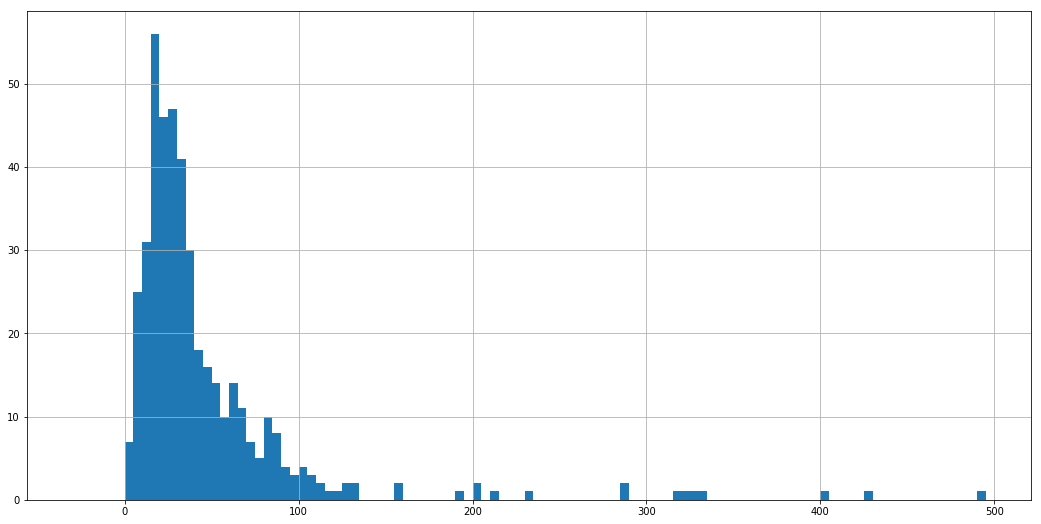

In [32]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print("SOME VISUALS AS BELOW:")
print ("P/E distribution and count of companies\
       ")
print ("*****************************************************************")
print ("*****************************************************************")
bin_values = np.arange(start=-30, stop=500, step=5)
result_f['P_BY_E'].hist(bins=bin_values, figsize=[18,9])


DISTRIBUTION OF SECTORS AND COMPANY COUNT


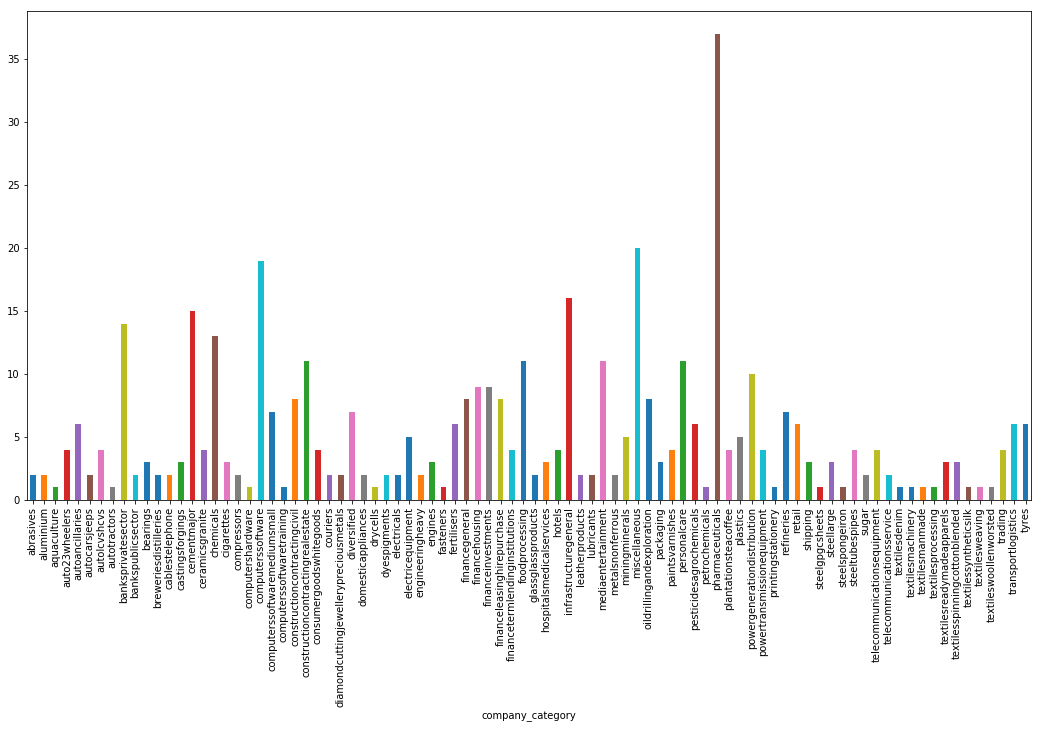

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
result_f.groupby('company_category').size().plot(kind='bar',figsize=(18,9))

print ("DISTRIBUTION OF SECTORS AND COMPANY COUNT")

In [34]:
##OUTLIERS OF P/E, having more value of P/E than 70, which can either be fixed by reverify   
#or data can be normnalized using modifed log values. Latter wasnt expected and  "done":
result_f1=result_f
result_f1.loc[:,'P_BY_E_NORMALIZED'] = result_f.P_BY_E.apply(lambda x: np.log(x + 1))


In [35]:
result_f1 
### CAN BE SEEN P_BY_E_NORMALIZED value

,LINK,company_code,company_category,company_name,BOOK_VALUE_RS,DIV_PERCENT,DIV_YIELD_PERCENT,EPS_TTM,FACE_VALUE,INDUSTRY_P_BY_E,MARKETCAP_RS_CR,MARKET_LOT,P_BY_C,P_BY_E,PRICE_BY_BOOK,sector,count_comp_cat,P_BY_E_NORMALIZED
0,http://www.moneycontrol.com/india/stockpricequ...,MI42,diversified,3mindia,1364.33,0.0,NaN,275.66,10.0,22.07,22192.19,1,62.99,71.46,14.44,DIVERSIFIED,7,4.283035
1,http://www.moneycontrol.com/india/stockpricequ...,BLC,diversified,balmerlawriecompany,118.49,70.0,3.16,16.21,10.0,22.07,2523.45,1,11.94,13.66,1.87,DIVERSIFIED,7,2.685123
2,http://www.moneycontrol.com/india/stockpricequ...,CTI,diversified,centurytextilesindustries,255.47,55.0,0.60,33.27,10.0,22.07,10211.78,1,14.90,27.48,3.58,DIVERSIFIED,7,3.349202
3,http://www.moneycontrol.com/india/stockpricequ...,DCM02,diversified,dcmshriram,198.77,290.0,1.90,42.39,2.0,22.07,4968.31,1,6.01,7.22,1.54,DIVERSIFIED,7,2.106570
4,http://www.moneycontrol.com/india/stockpricequ...,GI01,diversified,grasimindustries,247.47,275.0,0.53,26.90,2.0,22.07,67808.36,1,28.30,38.34,4.17,DIVERSIFIED,7,3.672242
5,http://www.moneycontrol.com/india/stockpricequ...,NBV,diversified,navabharatventures,160.54,50.0,0.69,9.05,2.0,22.07,2606.31,1,13.10,16.13,0.91,DIVERSIFIED,7,2.840831
6,http://www.moneycontrol.com/india/stockpricequ...,V,diversified,voltas,105.36,350.0,0.67,15.15,1.0,22.07,17220.90,1,33.09,34.35,4.94,DIVERSIFIED,7,3.565298
7,http://www.moneycontrol.com/india/stockpricequ...,PMS01,computerssoftware,8kmilessoftwareservices,28.49,0.0,NaN,1.60,5.0,21.82,1631.62,1,285.91,334.16,18.77,COMPUTERS - SOFTWARE,19,5.814608
8,http://www.moneycontrol.com/india/stockpricequ...,IE07,computerssoftware,cyient,202.30,210.0,1.44,35.59,5.0,21.82,8219.09,1,18.16,20.45,3.60,COMPUTERS - SOFTWARE,19,3.065725
9,http://www.moneycontrol.com/india/stockpricequ...,HCL02,computerssoftware,hcltechnologies,186.49,600.0,1.27,52.87,2.0,21.82,131914.73,1,15.98,17.92,5.08,COMPUTERS - SOFTWARE,19,2.940220


P/E_normalized distribution and count of companies       
*****************************************************************
*****************************************************************


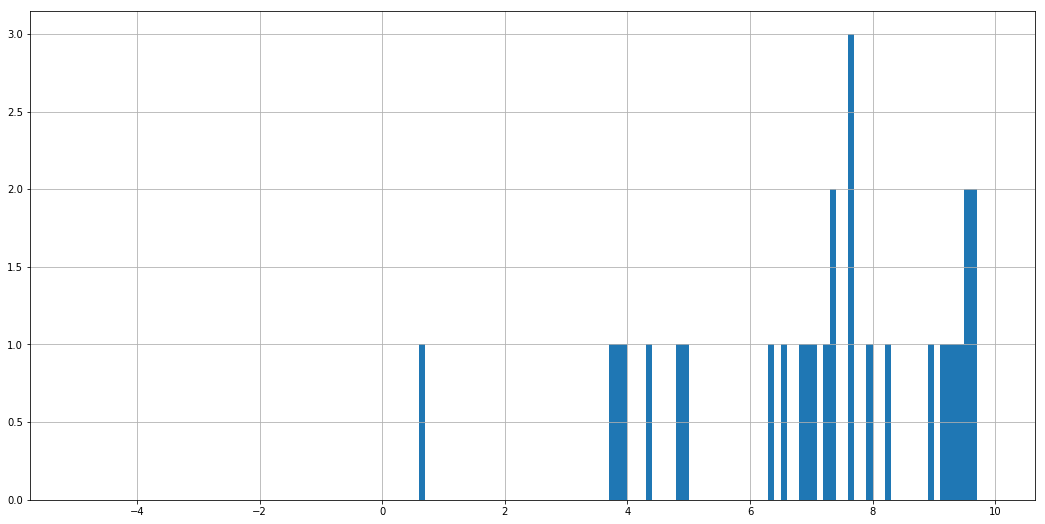

In [36]:
print ("P/E_normalized distribution and count of companies\
       ")
print ("*****************************************************************")
print ("*****************************************************************")
bin_values = np.arange(start=-5, stop=10, step=0.1)
result_f['P_BY_E'].hist(bins=bin_values, figsize=[18,9])

###ULTIMATELY OBSERVED, NORMALIZE CANT WORK JUST 1 PARAM, MAY BE NECESSARY to UNDERSTAND OTHEr params too and normalize them too

DISTRIBUTION OF MARKETCAP_RS_CR in CRORES and count of companies


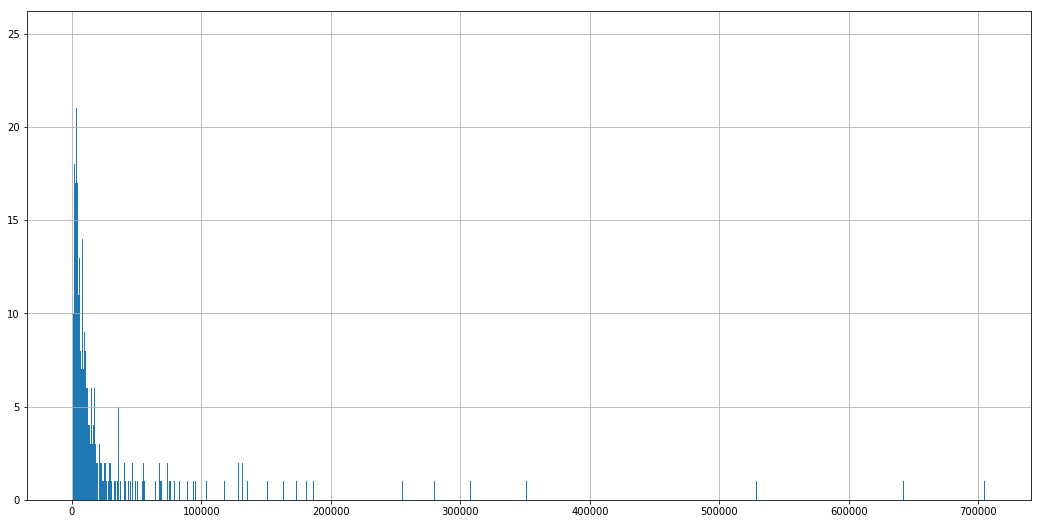

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

bin_values = np.arange(start=result_f.MARKETCAP_RS_CR.min()-100, stop=result_f.MARKETCAP_RS_CR.max()+1000, step=500)
result_f['MARKETCAP_RS_CR'].hist(bins=bin_values, figsize=[18,9])

print ("DISTRIBUTION OF MARKETCAP_RS_CR in CRORES and count of companies")

C:\Users\vemu0615\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


DISTRIBUTION OF MARKETCAP_RS_CR as per sectors for 3rd and 4th highest based companies


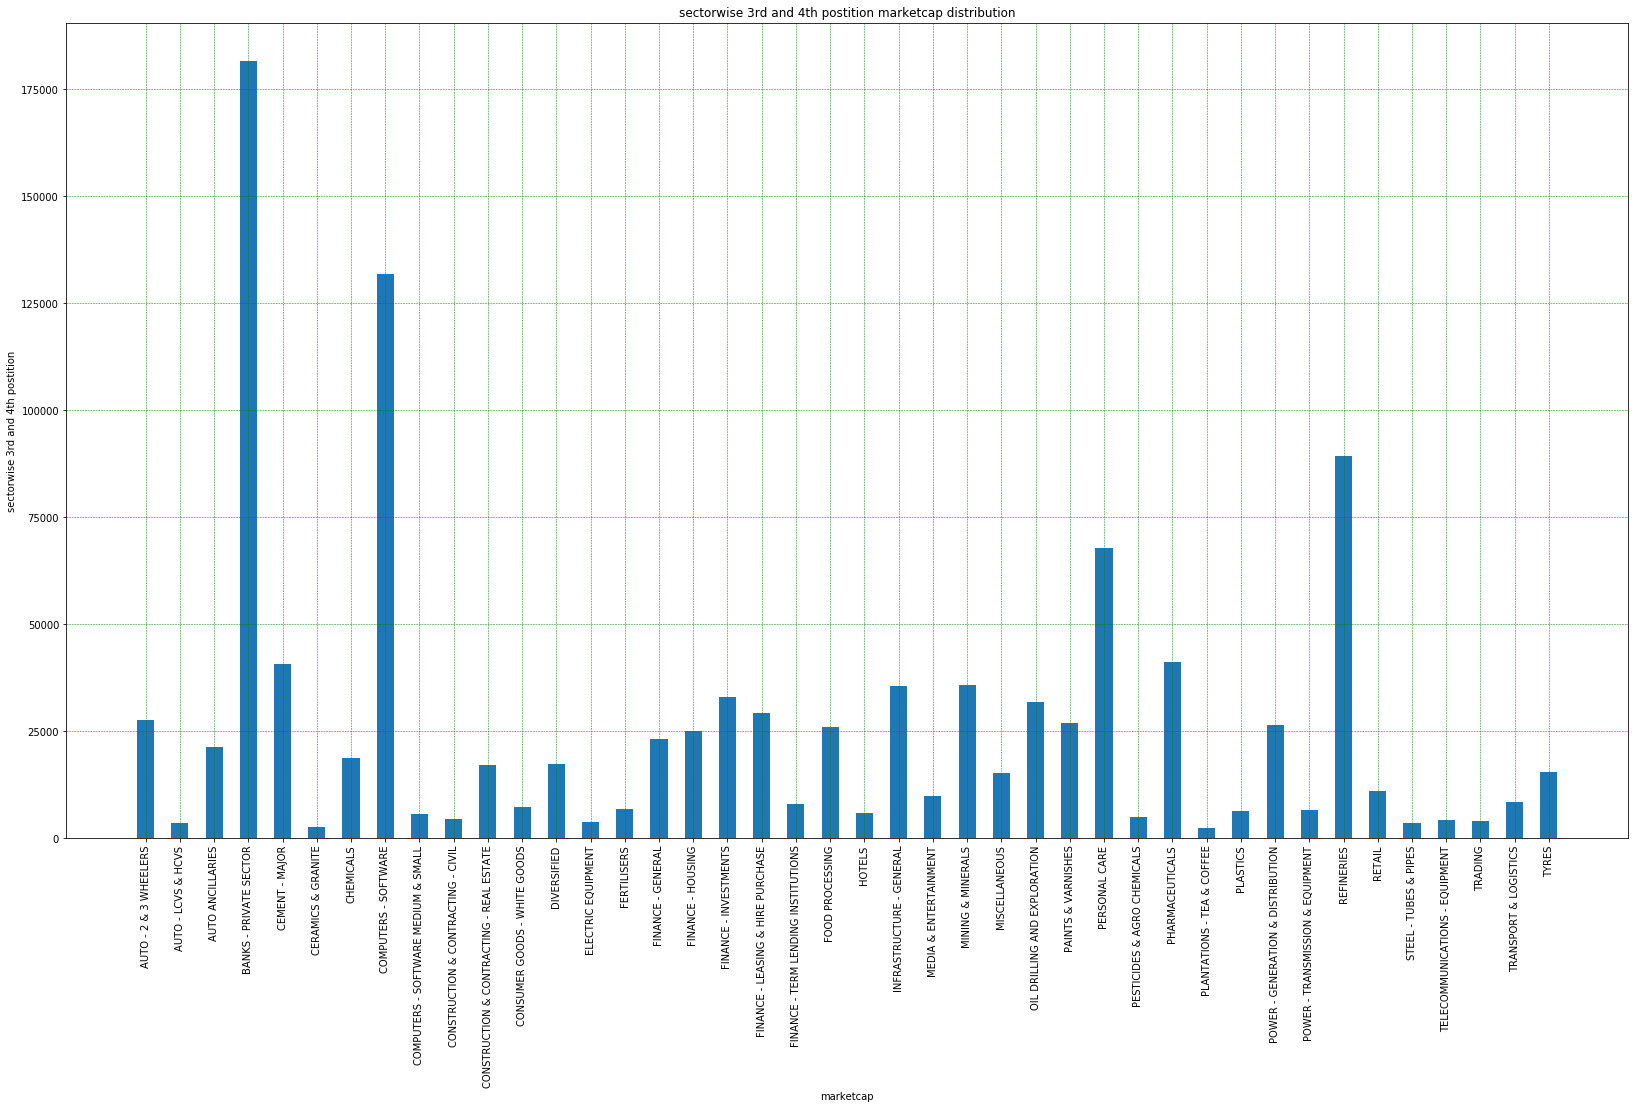

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(28, 15)
ax.bar(left=df_cc2.sector, height=df_cc2['MARKETCAP_RS_CR'], width=0.5)
ax.set_xlabel("marketcap")
ax.set_ylabel("sectorwise 3rd and 4th postition")
ax.set_title("sectorwise 3rd and 4th postition marketcap distribution")
ax.grid(color='g', linestyle='--', linewidth=0.5)
plt.xticks(rotation='vertical')
print("DISTRIBUTION OF MARKETCAP_RS_CR as per sectors for 3rd and 4th highest based companies")

*****************************************************************
*****************************************************************
companywise 3rd and 4th and marketcap value on y axis        
*****************************************************************
*****************************************************************


C:\Users\vemu0615\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


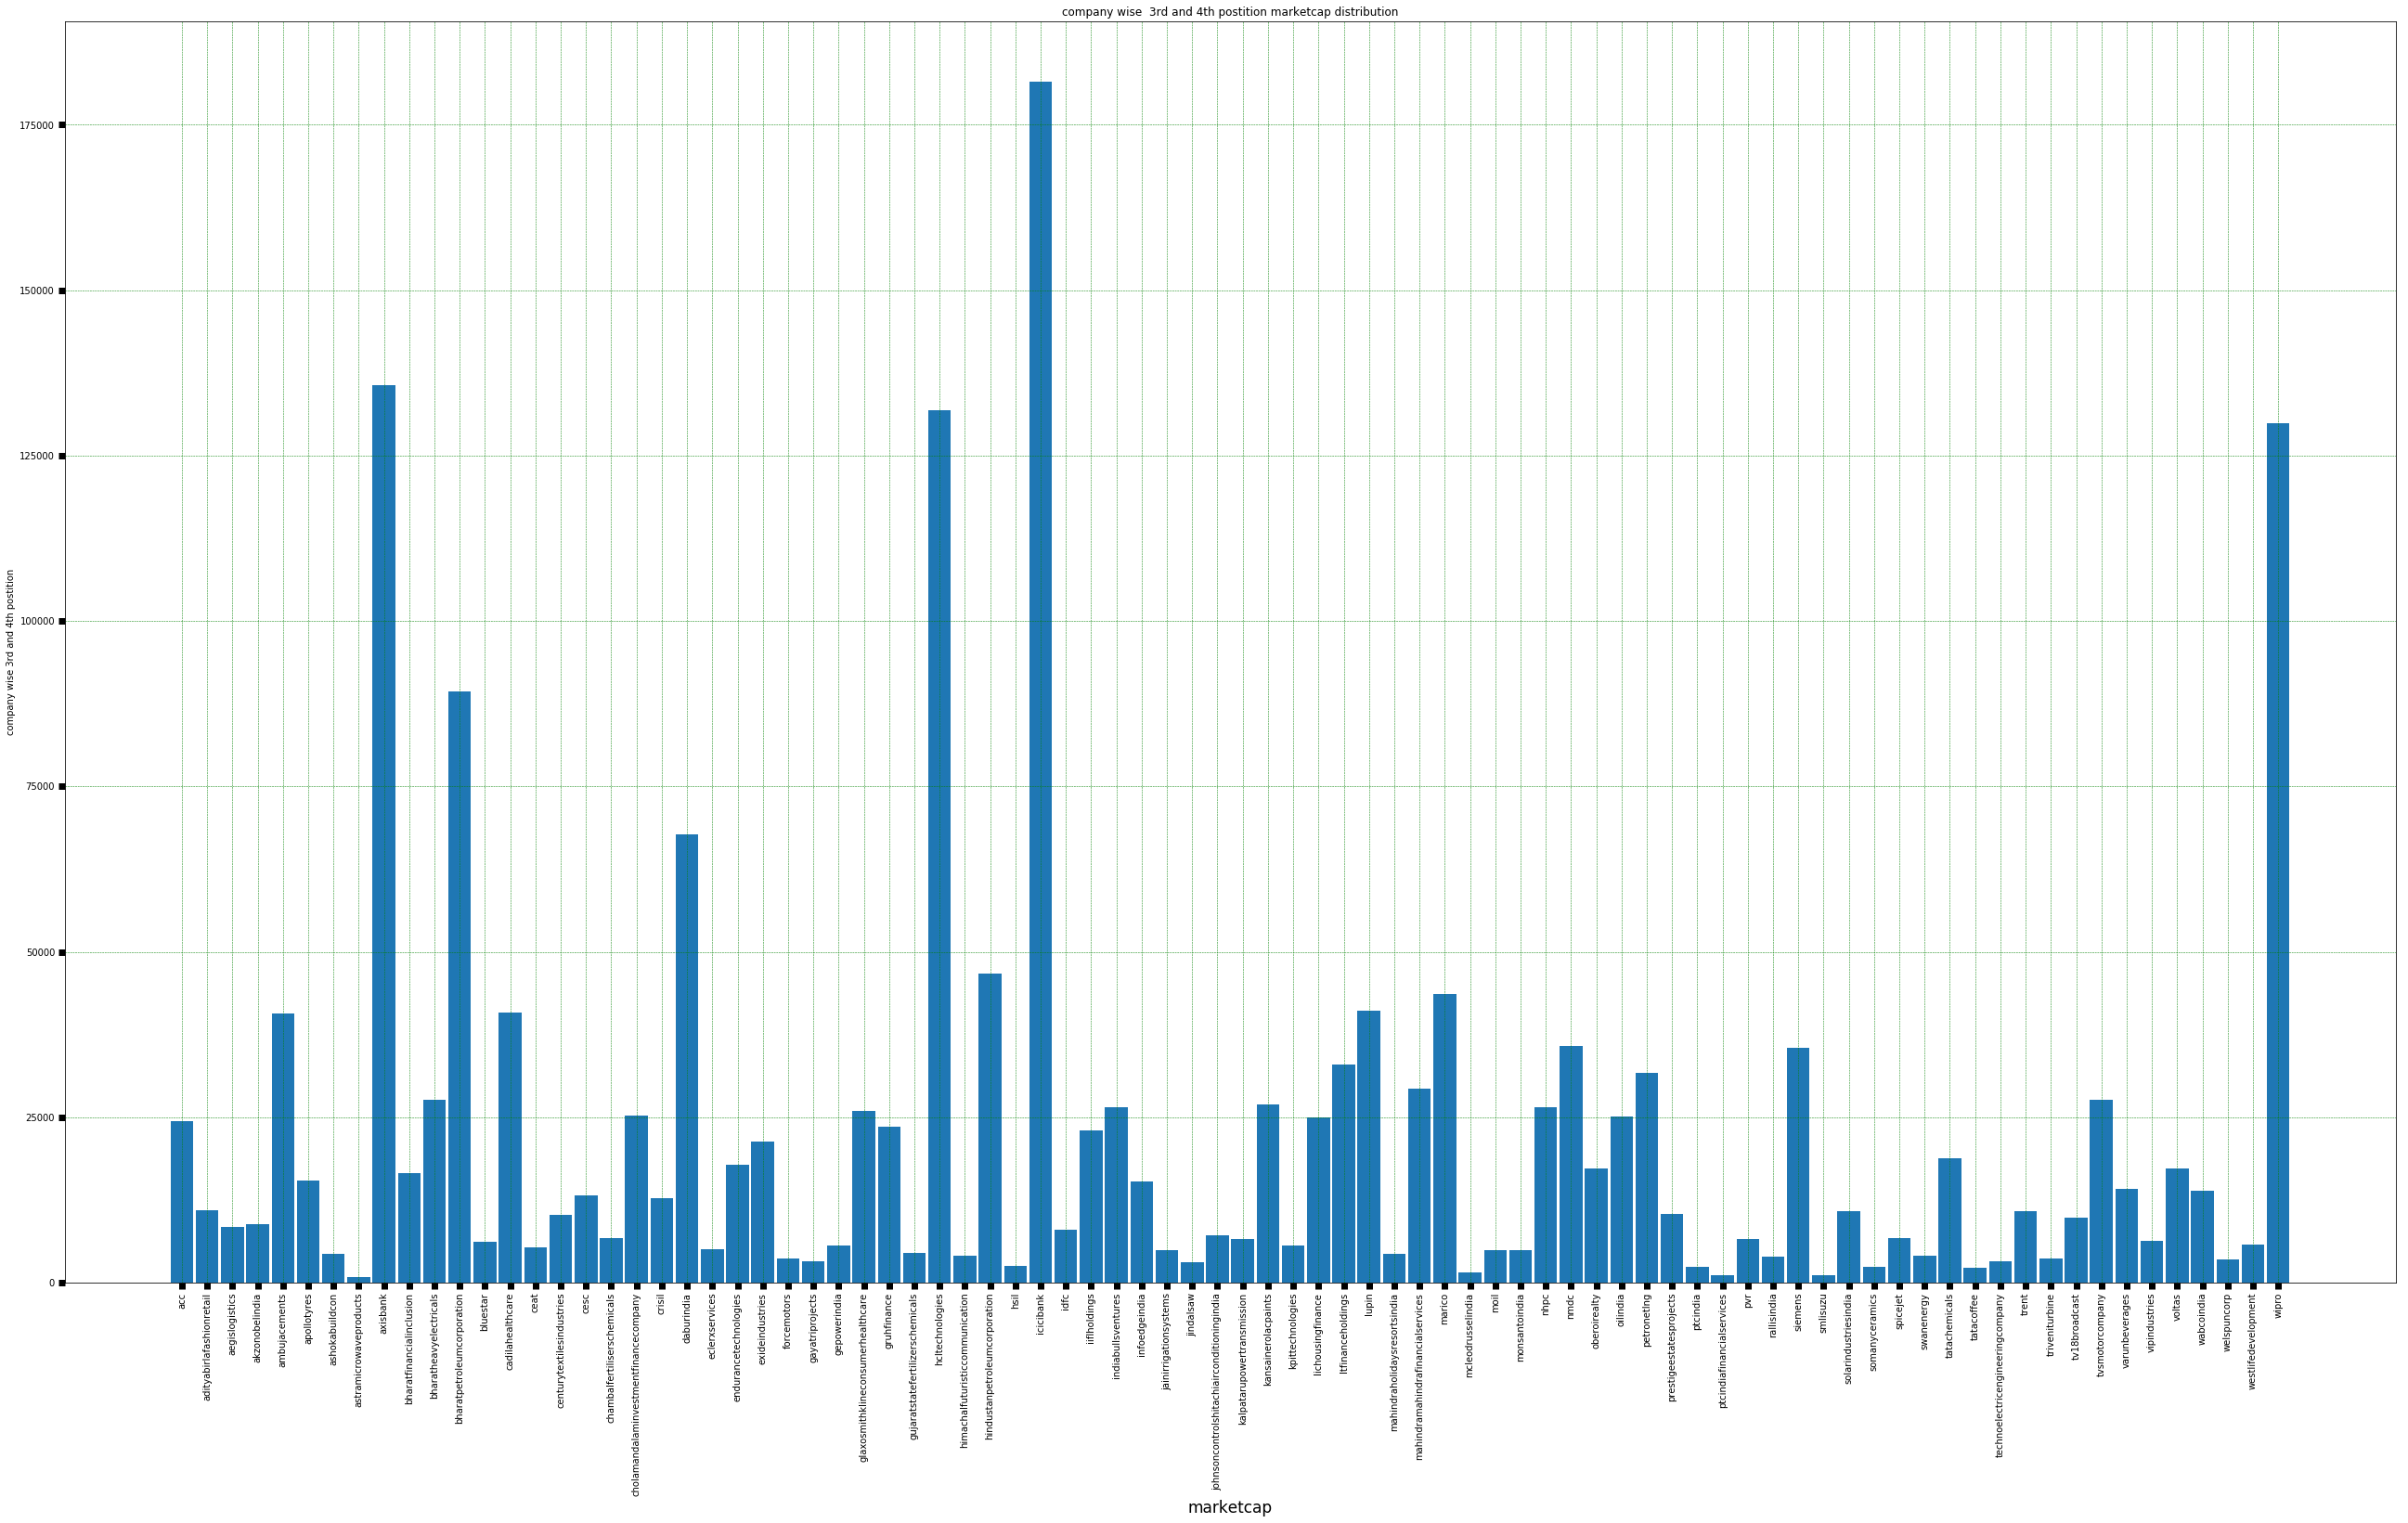

In [39]:
print ("*****************************************************************")
print ("*****************************************************************")
print ("companywise 3rd and 4th and marketcap value on y axis \
       ")
print ("*****************************************************************")
print ("*****************************************************************")
fig, ax = plt.subplots()
fig.set_size_inches(45, 25)
ax.bar(left=df_cc2.company_name, height=df_cc2['MARKETCAP_RS_CR'], width=0.9)
plt.xlabel('xlabel', fontsize=45)
ax.set_xlabel("marketcap")
ax.set_ylabel("company wise 3rd and 4th postition")
ax.set_title("company wise  3rd and 4th postition marketcap distribution")
ax.xaxis.label.set_size(17)
ax.grid(color='g', linestyle='--', linewidth=0.5)
plt.xticks(rotation='vertical')
ax.tick_params(direction='out', length=7, width=7 )

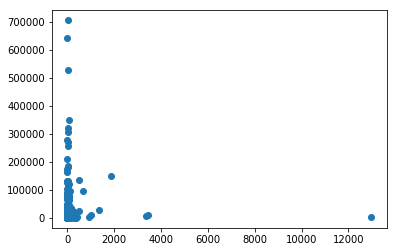

In [40]:
import matplotlib.pyplot as plt
plt.scatter(result_f['P_BY_E'], result_f['MARKETCAP_RS_CR'])
plt.show() # Depending on MARKETCAP_RS_CR on y axis vs P_BY_E on x 

### No such observation that p/e increasse and thus MC also increase

In [41]:
print("lets undesrtand dependent variabnle marketcap ==> how its dependent on independent params 'BOOK_VALUE_RS','FACE_VALUE','INDUSTRY_P_BY_E','P_BY_C'")

lets undesrtand dependent variabnle marketcap ==> how its dependent on independent params 'BOOK_VALUE_RS','FACE_VALUE','INDUSTRY_P_BY_E','P_BY_C'


In [42]:
pf=result_f.loc[:,('BOOK_VALUE_RS','FACE_VALUE','INDUSTRY_P_BY_E','P_BY_C','MARKETCAP_RS_CR')] #,index='MARKETCAP_RS_CR'

In [43]:
pf.set_index('MARKETCAP_RS_CR')

,BOOK_VALUE_RS,FACE_VALUE,INDUSTRY_P_BY_E,P_BY_C
MARKETCAP_RS_CR,,,,
22192.19,1364.33,10.0,22.07,62.99
2523.45,118.49,10.0,22.07,11.94
10211.78,255.47,10.0,22.07,14.90
4968.31,198.77,2.0,22.07,6.01
67808.36,247.47,2.0,22.07,28.30
2606.31,160.54,2.0,22.07,13.10
17220.90,105.36,1.0,22.07,33.09
1631.62,28.49,5.0,21.82,285.91
8219.09,202.30,5.0,21.82,18.16


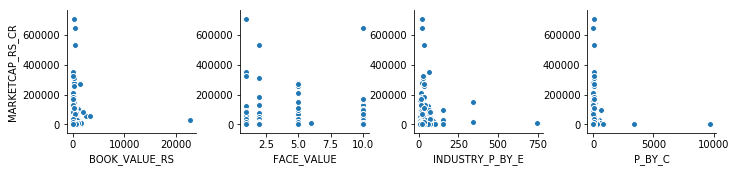

In [44]:
import seaborn as sns
pp = sns.pairplot(data=pf,
                  y_vars=['MARKETCAP_RS_CR'],
                  x_vars=['BOOK_VALUE_RS','FACE_VALUE','INDUSTRY_P_BY_E','P_BY_C'])

In [45]:
#SQL output:
sql_f=result_f.iloc[:,1:16]
sql_f.to_csv('moneycontrol_after_cleaning_analyze_forsql.csv',index=False)
